# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

In [13]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the distribtion of body temperatures normal?

In [14]:
body_temp = df['temperature']
stats.normaltest(body_temp)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

Note that the p-value is suitably small. Therefore we know that the body temperatures are normally distributed.

### 2. Is the sample size large? Are the observations independent?

In [15]:
df.shape

(130, 3)

In [16]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


130 out of 7 billion is not a sufficient ratio for 130 to reflect the body temperature of all humanity. However, the central limit theorem asks for a sample size large enough. 'Large enough' is determined by the normal distribution of the mean. We saw earlier in the first question that the body temperature is normally distributed. Therefore, the sample size is large enough.

The observations are independent as the body temperature and heart rate of one human does not effect the body temperature and heart rate of another, baring incident involving illness or adrenaline. I believe it may be assumed that these 130 values were not taken with the subjects under the effects of illness or adrenaline.

Thus, yes, the sample size is large. Yes, the observations are independent.

### 3. Is the true population mean really 98.6 degrees F?

We can see from the description results that the mean tempertaure in the sample set is 98.2 degrees F. 98.6 falls within the standard deviation. We will check using something (?).

Let's do a bootstrap test.

The null hypothesis is that the true population mean is really 98.6 degrees F. The alternative hypothesis is that mean is 98.2. We'll start by finding the observed value of the test statistic.

In [17]:
np.mean(df['temperature'])

98.24923076923078

In [18]:
bs_sample = np.random.choice(df['temperature'], size = 130)
np.mean(bs_sample)

98.23615384615385

Text(0,0.5,'# of People')

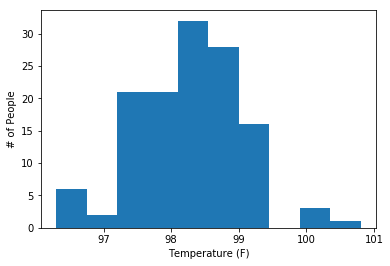

In [20]:
plt.hist(bs_sample)
plt.xlabel('Temperature (F)')
plt.ylabel('# of People')

Text(0,0.5,'# of People')

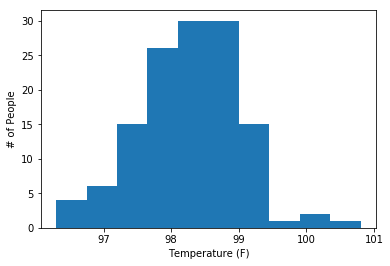

In [21]:
plt.hist(df['temperature'])
plt.xlabel('Temperature (F)')
plt.ylabel('# of People')

In [22]:
p_value = np.sum(bs_sample >= df['temperature'])/len(bs_sample)
p_value

0.5230769230769231

We can see that our p-value is statistically significant. This does not tell us whether the null hypothesis is true or not.
Since the p-value is significantly larger than 0.05, we fail to reject the null hypothesis that 98.6 is the true mean temperature. 

A t-test compares two datasets and usually has less than 30 values. z-tests compare sample sets to the general population. They generally have more than 30 values. Since we are trying to determine whether the sample temperature is reflective of the true mean temperature of the human population, we are trying to use a sample to reflect the general population. We have 130 values which is greater than 30. Therefore we would do a z-test.

In [23]:
from statsmodels.stats.weightstats import ztest
z = ztest(df['temperature'],value=98.6)
z

(-5.4548232923645195, 4.9021570141012155e-08)

The small p-value indicates that we can reject the null hypothesis.

We will do the t-test anyway as requested in the assignment details.

In [24]:
t = stats.ttest_1samp(df['temperature'],98.6)
t

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The small p-value from the t-test also indicates that we can reject the null hypothesis. 

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [28]:
sample10 = np.random.choice(df['temperature'], size = 10)
z10 = ztest(sample10,value=98.6)
t10 = stats.ttest_1samp(sample10,98.6)
t10, z10

(Ttest_1sampResult(statistic=-2.7813605907840064, pvalue=0.021353226450238065),
 (-2.7813605907840064, 0.005413157427697771))

The correct test to use is the t-test since the sample size is less than 30.
The p-values for the sample of size 10 are much greater than the p-values of 130 values. The statistic result is halved. 

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

We will find a confidence interval to determine the answer.

In [29]:
conf_int = np.percentile(df['temperature'], [2.5, 97.5])
conf_int

array([96.7225, 99.4775])

In [30]:
conf_int_sample = np.percentile(bs_sample, [2.5, 97.5])
conf_int_sample

array([96.4675, 99.865 ])

In [31]:
conf_int_10 = np.percentile(sample10, [2.5, 97.5])
conf_int_10

array([97.1225, 99.1775])

Using the original dataframe and the resampled dataframes, the more accurate range will come from the dataframe with more values, ie. the original one. Therefore we will say that temperature values under 96.7 degrees F and temperature values over 99.5 degrees F can be considered abnormal.

### 6. Is there a significant difference between males and females in normal temperature?

In [32]:
female = df[df.gender == 'F']
male = df[df.gender == 'M'] 
female, male

(     temperature gender  heart_rate
 0           99.3      F        68.0
 1           98.4      F        81.0
 3           99.2      F        66.0
 4           98.0      F        73.0
 8           98.4      F        84.0
 9           98.6      F        86.0
 10          98.8      F        89.0
 11          96.7      F        62.0
 13          98.7      F        79.0
 14          97.8      F        77.0
 15          98.8      F        83.0
 16          98.3      F        79.0
 18          97.2      F        68.0
 20          98.3      F        78.0
 25          98.0      F        87.0
 26          97.8      F        62.0
 27          98.2      F        69.0
 28          98.4      F        73.0
 31          97.6      F        61.0
 38          97.9      F        79.0
 39          96.4      F        69.0
 40          98.4      F        79.0
 44          99.0      F        79.0
 45          97.9      F        69.0
 50          98.9      F        76.0
 51          98.3      F        80.0
 

In [33]:
female.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [34]:
male.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


We'll let the null hypothesis be that the sample temperature mean for each gender dataframe is the same. There is no significant difference between the two.

The alternative hypothesis is that there is a significant difference between the two means.

Visually from the descriptions above, we can already see that the means are not the same but less us see how significantly different the two means are.

We will use a t-test as we are comparing two datasets to see how similar they are.

In [35]:
t = stats.ttest_ind(male['temperature'],female['temperature'])
t

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

The p-value is less than half 0.05. This indicates that we can reject our null hypothesis that the mean temperatures of males and females are the same. There is a statistically significant difference between the two.